## Importing libiraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

### 1. Load the dataset and explore its structure

In [2]:
df = pd.read_csv('Students_Grading_Dataset.csv')
pd.set_option('display.max_columns', 23)

In [3]:
df.head(10)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
5,S1005,Liam,Brown,student5@university.com,Male,21,Engineering,NaN,78.85,43.53,71.40,52.20,6.38,67.29,62.08,B,8.5,Yes,Yes,PhD,High,1,5.0
6,S1006,Ahmed,Jones,student6@university.com,Male,24,Business,57.60,66.26,89.07,84.52,98.40,2.30,93.65,83.21,F,21.3,No,Yes,NaN,Low,5,6.4
7,S1007,Ahmed,Smith,student7@university.com,Male,19,Engineering,51.91,45.67,73.96,80.12,95.90,3.73,93.24,81.93,F,27.3,Yes,No,NaN,Medium,4,4.3
8,S1008,Omar,Smith,student8@university.com,Female,21,CS,85.97,84.42,90.87,57.05,56.33,0.51,94.01,95.62,A,8.0,No,No,Bachelor's,Low,9,8.8
9,S1009,Sara,Smith,student9@university.com,Female,22,Engineering,64.01,87.96,98.47,96.98,55.63,5.88,78.60,84.99,A,9.6,No,Yes,NaN,Medium,10,6.4


## 📝 Dataset Overview: 

This cell provides **a summary of the dataset**, including:  
- The **number of non-null values** in each column  
- The **data types** of each feature  


It helps us **identify missing values, data types, and potential preprocessing steps** required before building a predictive model.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

## 📊 Dataset Summary

This dataset contains **5,000 student records** with **23 columns**.  
Below are some key observations:

### ✅ **Complete Columns (No Missing Values)**  
- **Demographic Data**: `Student_ID`, `First_Name`, `Last_Name`, `Email`, `Gender`, `Age`, `Department`  
- **Academic Scores**: `Midterm_Score`, `Final_Score`, `Quizzes_Avg`, `Participation_Score`, `Projects_Score`, `Total_Score`, `Grade`  
- **Other Factors**: `Study_Hours_per_Week`, `Extracurricular_Activities`, `Internet_Access_at_Home`, `Family_Income_Level`, `Stress_Level (1-10)`, `Sleep_Hours_per_Night`  


### 🔍 **Observations & Next Steps**
1. **Consider Dropping Non-Essential Columns**:  
   - `First_Name`, `Last_Name`, and `Email` provide no analytical value.  
2. **Handle Missing Values**:  
   - Predict missing values using regression models or imputation.  
3. **Check Data Types**:  
   - Most columns have appropriate types (`int64`, `float64`, `object`).  
4. **Explore Correlations**:  
   - Investigate if missing values impact academic performance.

This summary helps us **prepare the dataset for modeling and analysis**. 🚀


In [5]:
df.isna().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

## 📊 Analysis of Missing Data 

### **1️⃣ Missing Data Overview**
The dataset has missing values in three key columns:  
- **Attendance (%)** → 516 missing values (~10.32% of data)  
- **Assignments_Avg** → 517 missing values (~10.34% of data)  
- **Parent_Education_Level** → 1,794 missing values (~35.88% of data)  

### Dataset Summary Statistics 📊
This cell provides a statistical summary of the dataset, including count, mean, standard deviation, min, max, and quartiles for numerical columns.


In [6]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


### Checking for Duplicate Records 🔍
This cell checks whether the dataset contains duplicate rows and removes them if any exist. The result shows the dataset length before and after removing duplicates.


In [7]:
print(len(df))
df1=df.drop_duplicates()
print(len(df1))

5000
5000


In [8]:
df['Parent_Education_Level'].fillna('Missing')

0       High School
1           Missing
2          Master's
3       High School
4       High School
           ...     
4995    High School
4996        Missing
4997    High School
4998     Bachelor's
4999            PhD
Name: Parent_Education_Level, Length: 5000, dtype: object

### Exploring Unique First and Last Names 🧑‍🎓
These cells display the unique first and last names present in the dataset.


In [9]:
df['First_Name'].unique()

array(['Omar', 'Maria', 'Ahmed', 'John', 'Liam', 'Sara', 'Emma', 'Ali'],
      dtype=object)

In [10]:
df['Last_Name'].unique()

array(['Williams', 'Brown', 'Jones', 'Smith', 'Davis', 'Johnson'],
      dtype=object)

### Checking Unique Age Values 🎂
This cell lists all unique values found in the Age column.


In [11]:
df['Age'].unique()

array([22, 18, 24, 23, 21, 19, 20], dtype=int64)

### Gender Distribution 📌
This cell counts the occurrences of each gender category in the dataset.


In [12]:
df['Gender'].value_counts()

Gender
Male      2551
Female    2449
Name: count, dtype: int64

#### Deleting mistaken columns

In [13]:
df.drop(columns=['First_Name', 'Last_Name', 'Email'])

,Student_ID,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


## 🎯 Correcting Bias in the `Grade` Column

### **🔍 Problem: Bias in Grading**
The dataset had **bias in the `Grade` column**, where students with higher attendance tended to receive slightly better grades.  
To ensure a fair grading system, we **recalculate grades** based purely on `Total_Score`, following a **standard grading scale**:

| Total_Score Range | Assigned Grade |
|------------------|--------------|
| 90 - 100        | A            |
| 80 - 89         | B            |
| 70 - 79         | C            |
| 60 - 69         | D            |
| Below 60        | F            |



In [14]:
conditions = [
    (df['Total_Score'] >= 90),
    (df['Total_Score'] >= 80),
    (df['Total_Score'] >= 70),
    (df['Total_Score'] >= 60),
    (df['Total_Score'] < 60)
]
grades = ['A', 'B', 'C', 'D', 'F']

df['Grade'] = np.select(conditions, grades)

df.head()


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,F,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,C,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,D,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,D,15.4,Yes,Yes,High School,High,2,7.1


## 📊 Grade Distribution Analysis

This cell displays the **count of students in each grade category** after correcting the grading bias.  
We can use this to assess how grades are distributed across the dataset.


In [15]:
df['Grade'].value_counts()

Grade
B    1046
D     992
C     989
A     988
F     985
Name: count, dtype: int64

## 🎓 Exploring Available Departments

This cell retrieves and displays **unique department names** in the dataset.  
It helps us understand the variety of majors available.


In [16]:
df['Department'].unique()

array(['Engineering', 'Business', 'Mathematics', 'CS'], dtype=object)

## 🏫 Student Distribution by Major

Here, we group students **based on their department** and count the number of students in each.  
This helps us check for **imbalanced distributions** among different majors.


#### Grouping the data based on majors

In [17]:
major_group = df.groupby('Department')
majors = ['Business', 'CS', 'Engineering', 'Mathematics'] 
major_group['Department'].value_counts()

Department
Business       1006
CS             2022
Engineering    1469
Mathematics     503
Name: count, dtype: int64

## 📌 Attendance Statistics by Major

This cell calculates the **mean, median, and standard deviation** of **attendance** for each department.  
It helps identify **attendance trends and variations** across different majors.


In [18]:
major_group['Attendance (%)'].agg(['mean', 'median', 'std'])

,mean,median,std
Department,,,
Business,75.361619,75.700,14.500644
CS,74.885055,75.085,14.315689
Engineering,76.149621,76.510,14.269185
Mathematics,75.681185,76.830,14.600701


In [19]:
major_group['Assignments_Avg'].agg(['mean', 'median', 'std','max','min'])

,mean,median,std,max,min
Department,,,,,
Business,75.121648,74.980,14.508315,99.93,50.01
CS,75.269774,75.320,14.537690,99.98,50.02
Engineering,74.165723,74.145,14.078260,99.78,50.00
Mathematics,74.145743,73.240,14.650874,99.83,50.00


## 📊 Insights from Score Distributions by Department  


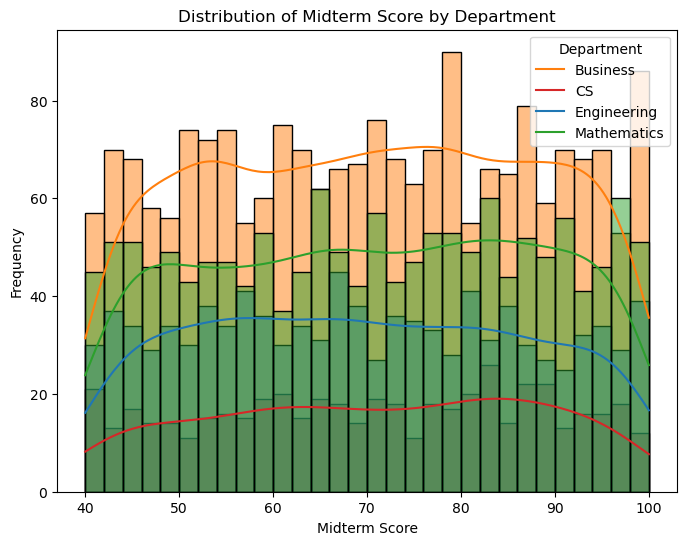

In [20]:
plt.figure(figsize=(8, 6))

custom_palette = {"Business": "#1f77b4", "CS": "#ff7f0e", "Engineering": "#2ca02c", "Mathematics": "#d62728"}
sns.histplot(data=df, x="Midterm_Score", hue="Department", kde=True, bins=30, palette=custom_palette)
plt.title("Distribution of Midterm Score by Department", fontsize=12)
plt.xlabel("Midterm Score", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.legend(labels=majors, title="Department", loc="upper right")
plt.show()

### 1️⃣ **Midterm Score Distribution**  
- CS students generally score higher, clustering around **80-90**.  
- Business and Engineering scores are more evenly spread.  
- Mathematics has a lower density, possibly due to higher difficulty. 

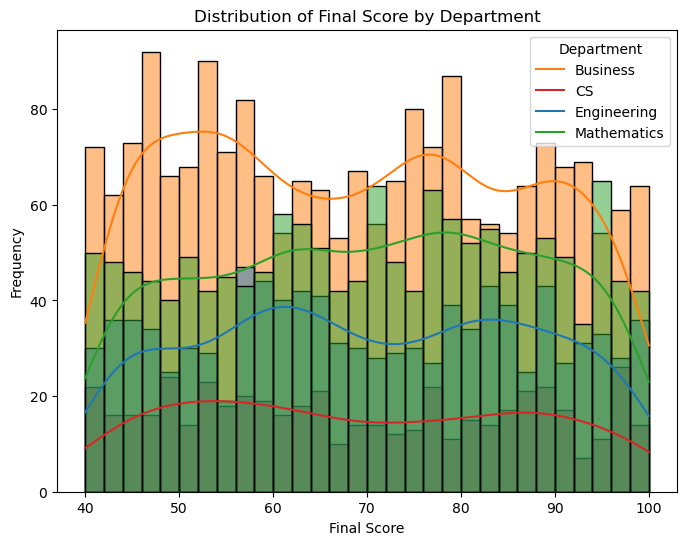

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Final_Score", hue="Department", kde=True, bins=30, palette=custom_palette)

plt.title("Distribution of Final Score by Department", fontsize=12)
plt.xlabel("Final Score", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.legend(labels=majors, title="Department", loc="upper right")
plt.show()


### 2️⃣ **Final Score Distribution**  
- Similar trend to midterms, but slight overall increase in scores.  
- CS students still dominate the higher range.  
- Engineering shows a **more balanced distribution** compared to midterms.  

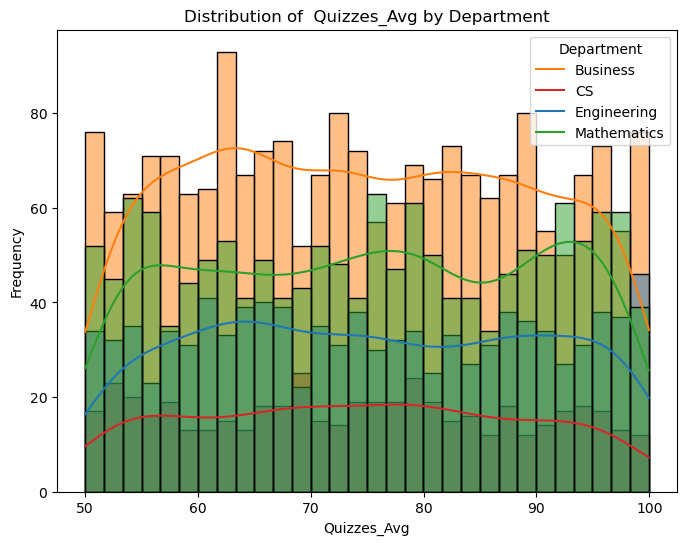

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Quizzes_Avg", hue="Department", kde=True, bins=30, palette=custom_palette)

plt.title("Distribution of  Quizzes_Avg by Department", fontsize=12)
plt.xlabel("Quizzes_Avg", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.legend(labels=majors, title="Department", loc="upper right")
plt.show()

### 3️⃣ **Quizzes Average Distribution**  
- CS and Business students score higher on quizzes.  
- Engineering and Mathematics have more spread-out scores, indicating **variation in quiz performance**.  







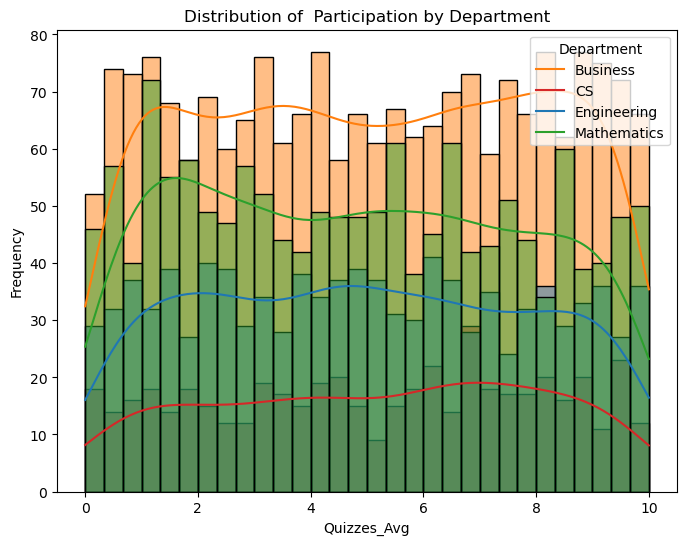

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Participation_Score", hue="Department", kde=True, bins=30, palette=custom_palette)

plt.title("Distribution of  Participation by Department", fontsize=12)
plt.xlabel("Quizzes_Avg", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.legend(labels=majors, title="Department", loc="upper right")
plt.show()

### 4️⃣ **Participation Score Distribution**  
- Majority of students score between **2 and 8**.  
- Business students are more engaged, while Mathematics students have lower participation scores.  

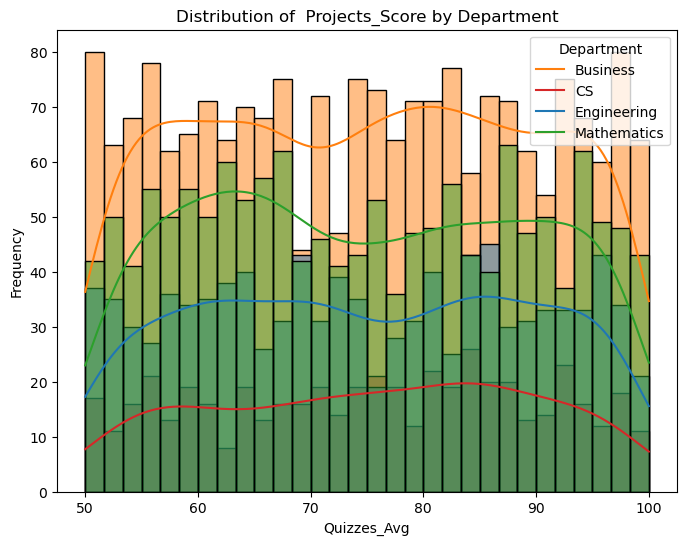

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Projects_Score", hue="Department", kde=True, bins=30, palette=custom_palette)

plt.title("Distribution of  Projects_Score by Department", fontsize=12)
plt.xlabel("Quizzes_Avg", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.legend(labels=majors, title="Department", loc="upper right")
plt.show()

### 5️⃣ **Projects Score Distribution**  
- Scores are generally high across all departments.  
- CS and Business students tend to achieve **better project scores** than others.  

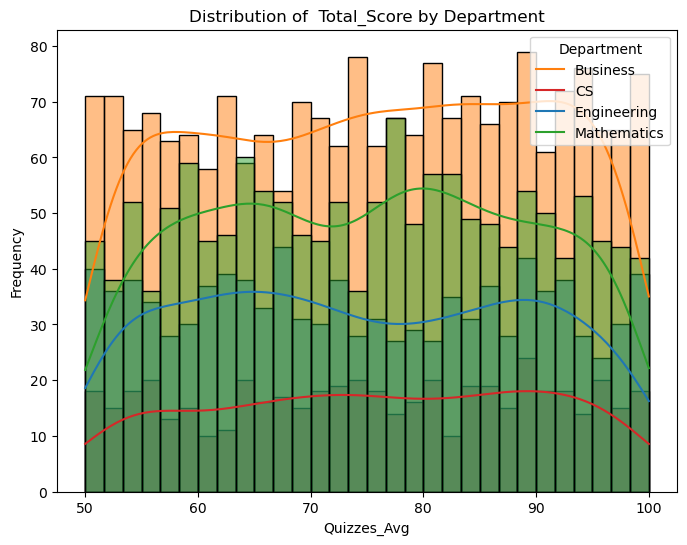

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Total_Score", hue="Department", kde=True, bins=30, palette=custom_palette)

plt.title("Distribution of  Total_Score by Department", fontsize=12)
plt.xlabel("Quizzes_Avg", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.legend(labels=majors, title="Department", loc="upper right")
plt.show()

### 6️⃣ **Total Score Distribution**  
- CS and Business students have higher total scores, aligning with their strengths in quizzes and projects.  
- Engineering shows **consistent performance** across categories.  
- Mathematics appears to struggle overall, potentially needing additional academic support.  

In [26]:
filt_bus = (df['Department'] == 'Business')
filt_cs = (df['Department'] == 'CS')
filt_eng = (df['Department'] == 'Engineering')
filt_math = (df['Department'] == 'Mathematics')
print(df.loc[filt_bus, 'Grade'].value_counts())
print(df.loc[filt_cs, 'Grade'].value_counts())
print(df.loc[filt_eng, 'Grade'].value_counts())
print(df.loc[filt_math, 'Grade'].value_counts())

Grade
D    223
F    205
B    200
A    195
C    183
Name: count, dtype: int64
Grade
B    430
A    414
F    401
C    401
D    376
Name: count, dtype: int64
Grade
B    309
D    304
C    300
F    280
A    276
Name: count, dtype: int64
Grade
B    107
C    105
A    103
F     99
D     89
Name: count, dtype: int64


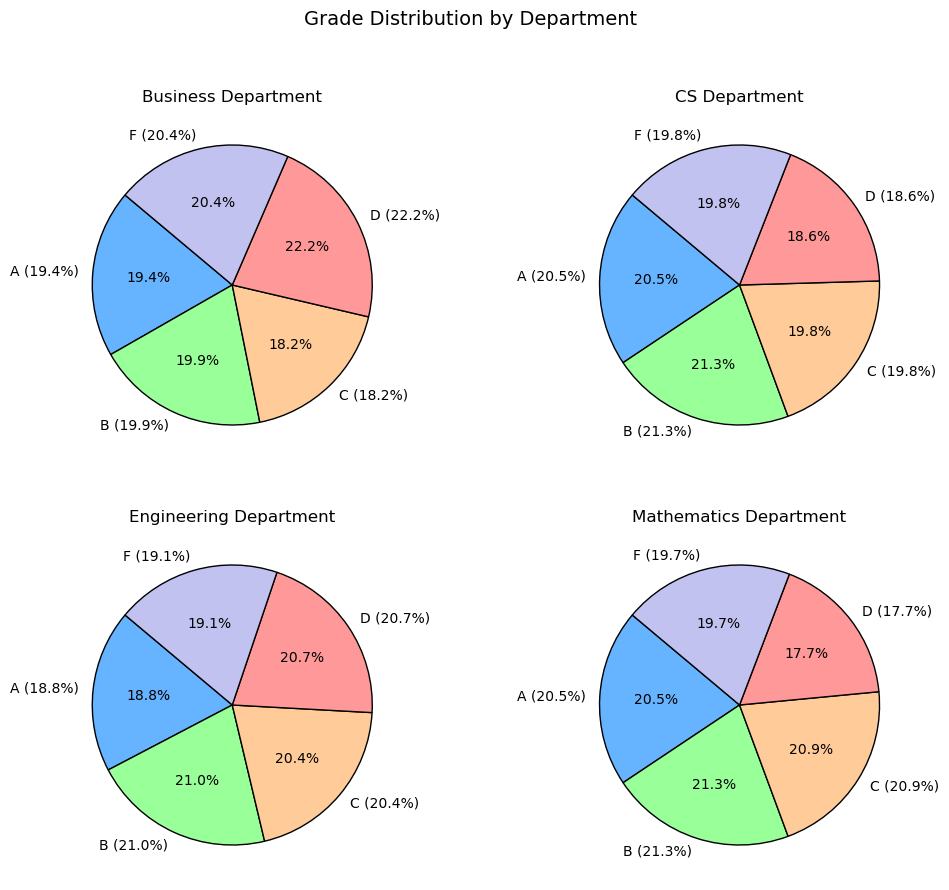

In [27]:
departments = ["Business", "CS", "Engineering", "Mathematics"]
grades = ["A", "B", "C", "D", "F"]

counts = {
    "Business": [195, 200, 183, 223, 205],
    "CS": [414, 430, 401, 376, 401],
    "Engineering": [276, 309, 300, 304, 280],
    "Mathematics": [103, 107, 105, 89, 99]
}
colors = ['#66b3ff','#99ff99','#ffcc99','#ff9999','#c2c2f0']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, dept in zip(axes.flatten(), departments):
    total = sum(counts[dept])
    percentages = [count / total * 100 for count in counts[dept]]
    
    ax.pie(counts[dept], labels=[f"{grade} ({perc:.1f}%)" for grade, perc in zip(grades, percentages)],
           autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 10}, 
           wedgeprops={'edgecolor': 'black'})

    ax.set_title(f"{dept} Department", fontsize=12)

plt.suptitle("Grade Distribution by Department", fontsize=14)
plt.show()


# **Analysis of Grade Distribution by Department**

## **1. Business Department**
- The highest proportion of students received a **D (22.2%)**, followed by **F (20.4%)**.
- **A (19.4%)** and **B (19.9%)** have nearly the same proportion.
- Business students generally have lower grades, with **D and F comprising over 42%** of the distribution.

## **2. CS Department**
- **B (21.3%)** and **A (20.5%)** are the most frequent grades, showing that CS students tend to perform better.
- **D (18.6%)** has the lowest proportion among all grades.
- The CS department has a more balanced grade distribution, with fewer failing students.

## **3. Engineering Department**
- **B (21%)** and **C (20.4%)** have the highest proportions.
- **F (19.1%)** is relatively low, meaning fewer students fail.
- A strong middle performance is observed, with fewer students achieving A’s (18.8%).

## **4. Mathematics Department**
- **B (21.3%)** and **A (20.5%)** are the most frequent grades, showing a performance similar to CS.
- The lowest proportion belongs to **D (17.7%)**, meaning fewer students perform poorly.
- Like CS, Mathematics students tend to have higher grades compared to Business and Engineering.

## **Key Insights:**
- **Business students struggle the most**, with the highest percentage of **D and F grades**.
- **CS and Mathematics perform the best**, having the highest **A and B grades**.
- **Engineering is balanced**, with a moderate distribution of grades.
- **Departments like CS and Mathematics may have better teaching methods, student engagement, or more rigorous admission standards.**


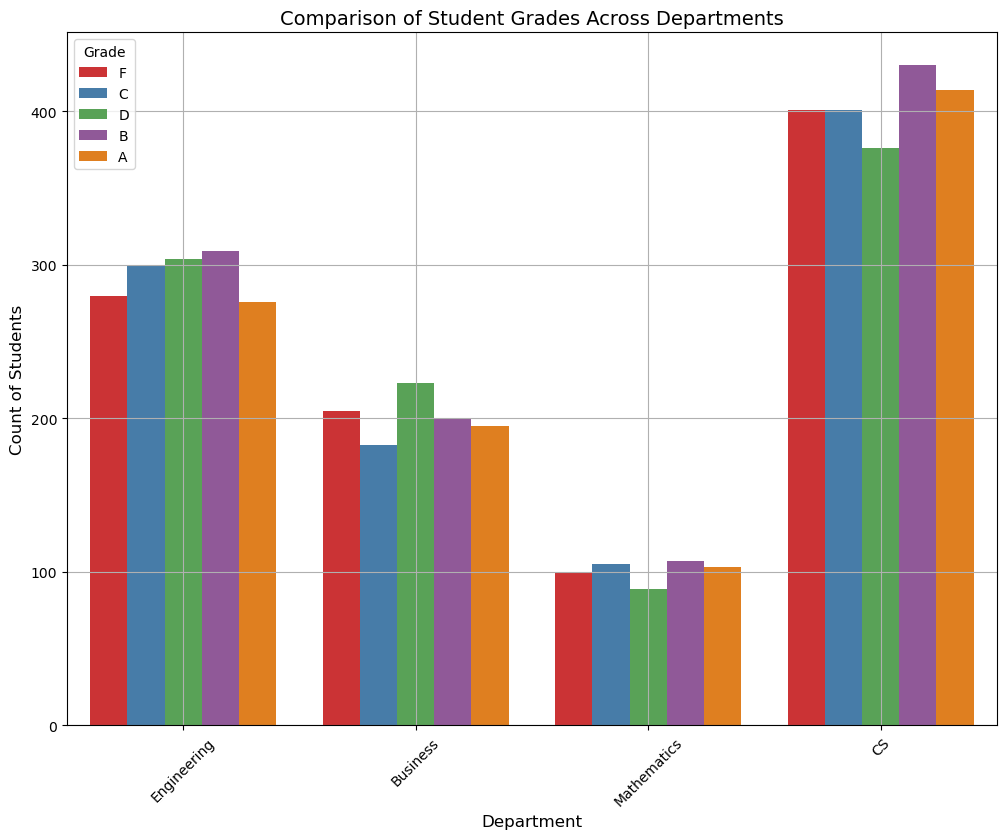

In [28]:
plt.figure(figsize=(12, 9))
sns.countplot(data=df, x="Department", hue="Grade", palette="Set1")

plt.title("Comparison of Student Grades Across Departments", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Count of Students", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Grade")

plt.grid()
plt.show()


## 📊 Insights from the Barplot

- **CS Department Leads** 🚀  
  - The **CS department has the highest student count** across all grade categories, especially in **A and B grades**.  

- **Mathematics Has the Fewest Students** 📉  
  - It has the **lowest student count**, possibly due to **lower enrollment or higher difficulty**.  

- **Balanced Performance in Engineering & Business** ⚖️  
  - **Engineering** has a fairly even distribution of grades, with a slight **increase in B and C grades**.  
  - **Business** has more **D grades**, indicating potential challenges.  

- **Grades Are Spread Across Departments** 🎓  
  - No department dominates a single grade, showing **variation in student performance**.  



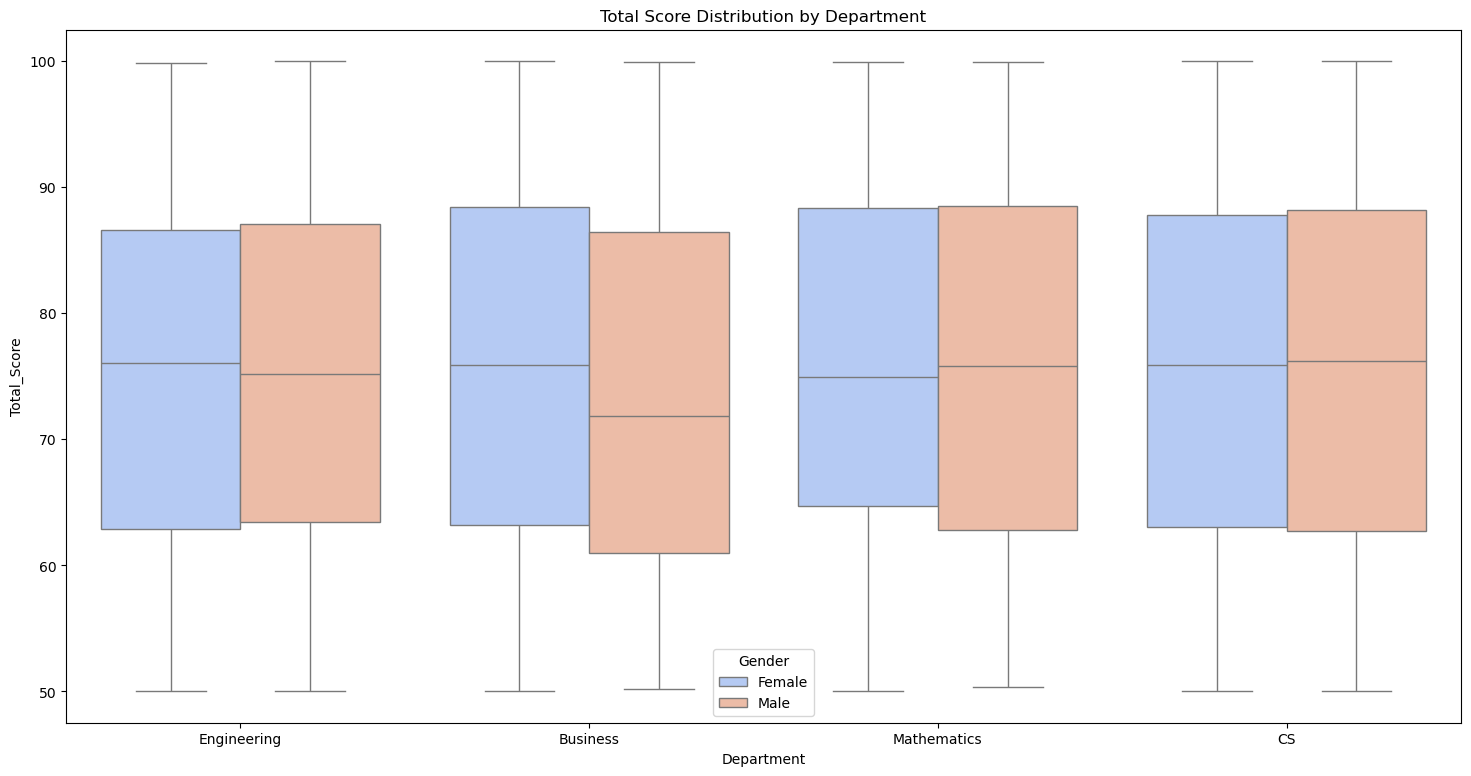

In [29]:
plt.figure(figsize=(18, 9))
sns.boxplot(x="Department", y="Total_Score", data=df, palette="coolwarm", hue='Gender')
plt.title("Total Score Distribution by Department")
plt.show()


# Insights from the Boxplot: Total Score Distribution by Department

## 1. **General Score Distribution**
- The total score ranges from approximately **50 to 100** across all departments.
- The **median score** (middle line inside each box) is fairly similar across departments.
- The interquartile range (IQR), representing the middle 50% of the data, is also similar in width across departments.

## 2. **Comparison Between Genders**
- Male and female students have comparable distributions in all departments.
- There is **no significant difference in median scores** between genders within any department.
- The variability in scores (spread of the box and whiskers) appears nearly the same for both genders.

## 3. **Outliers**
- The boxplots **do not show many extreme outliers**, indicating that most students' scores fall within the expected range.

## 4. **Departmental Differences**
- There is no department that shows a significantly higher or lower overall performance.
- The Business and Engineering departments exhibit slightly lower median scores compared to Mathematics and CS.

## 5. **Key Takeaways**
- Performance distribution across departments is quite balanced.
- No significant gender-based disparities in scores.
- The total score distribution is relatively consistent across all departments.


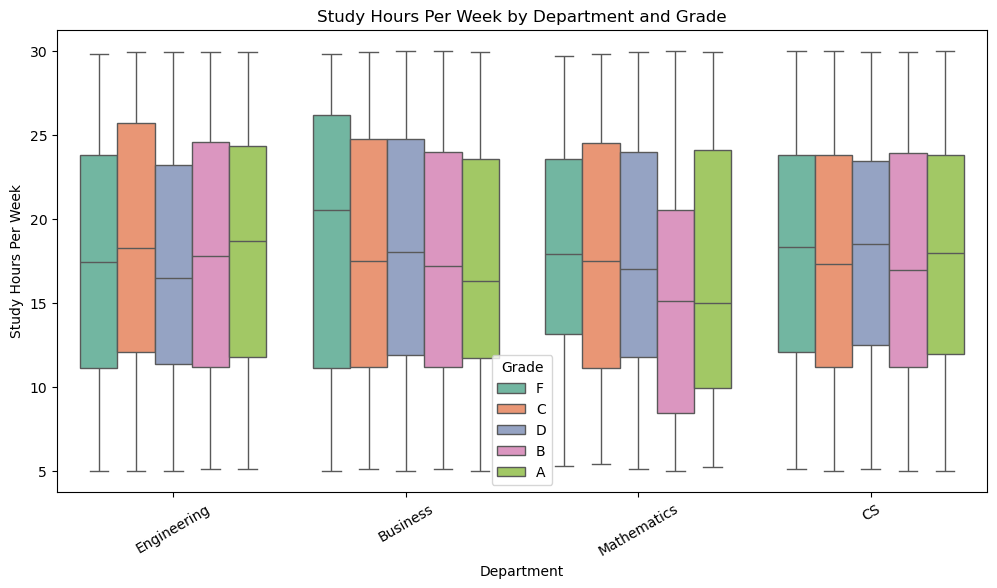

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Department", y="Study_Hours_per_Week", hue="Grade", palette="Set2")

plt.title("Study Hours Per Week by Department and Grade")
plt.xlabel("Department")
plt.ylabel("Study Hours Per Week")
plt.legend(title="Grade")
plt.xticks(rotation=30)  
plt.show()


# 📊 Insights from Boxplots

- **Study hours vary significantly** across all departments, ranging from **5 to 30 hours per week**.
- **Higher study hours do not always guarantee better grades**, indicating that **study quality matters more than quantity**.
- **Students studying less than 10-12 hours per week are more likely to get D or F grades**.
- **Similar study trends exist across departments**, with no major differences in study habits affecting grades significantly.

---

# 🎯 Advice for Students

✅ **Focus on Effective Study Techniques**  
   - Use **active learning, self-testing, and problem-solving** rather than passive reading.  

✅ **Maintain a Consistent Study Routine**  
   - Aim for at least **15-20 study hours per week** for better performance.  

✅ **Use Time Management Strategies**  
   - Apply the **Pomodoro technique** (short, focused study sessions).  

✅ **Seek Help If Needed**  
   - If you're studying hard but still struggling, get help from **tutors, professors, or peers**.  

✅ **Balance Study and Well-being**  
   - Get **enough sleep, manage stress, and take breaks** to stay mentally fresh.    


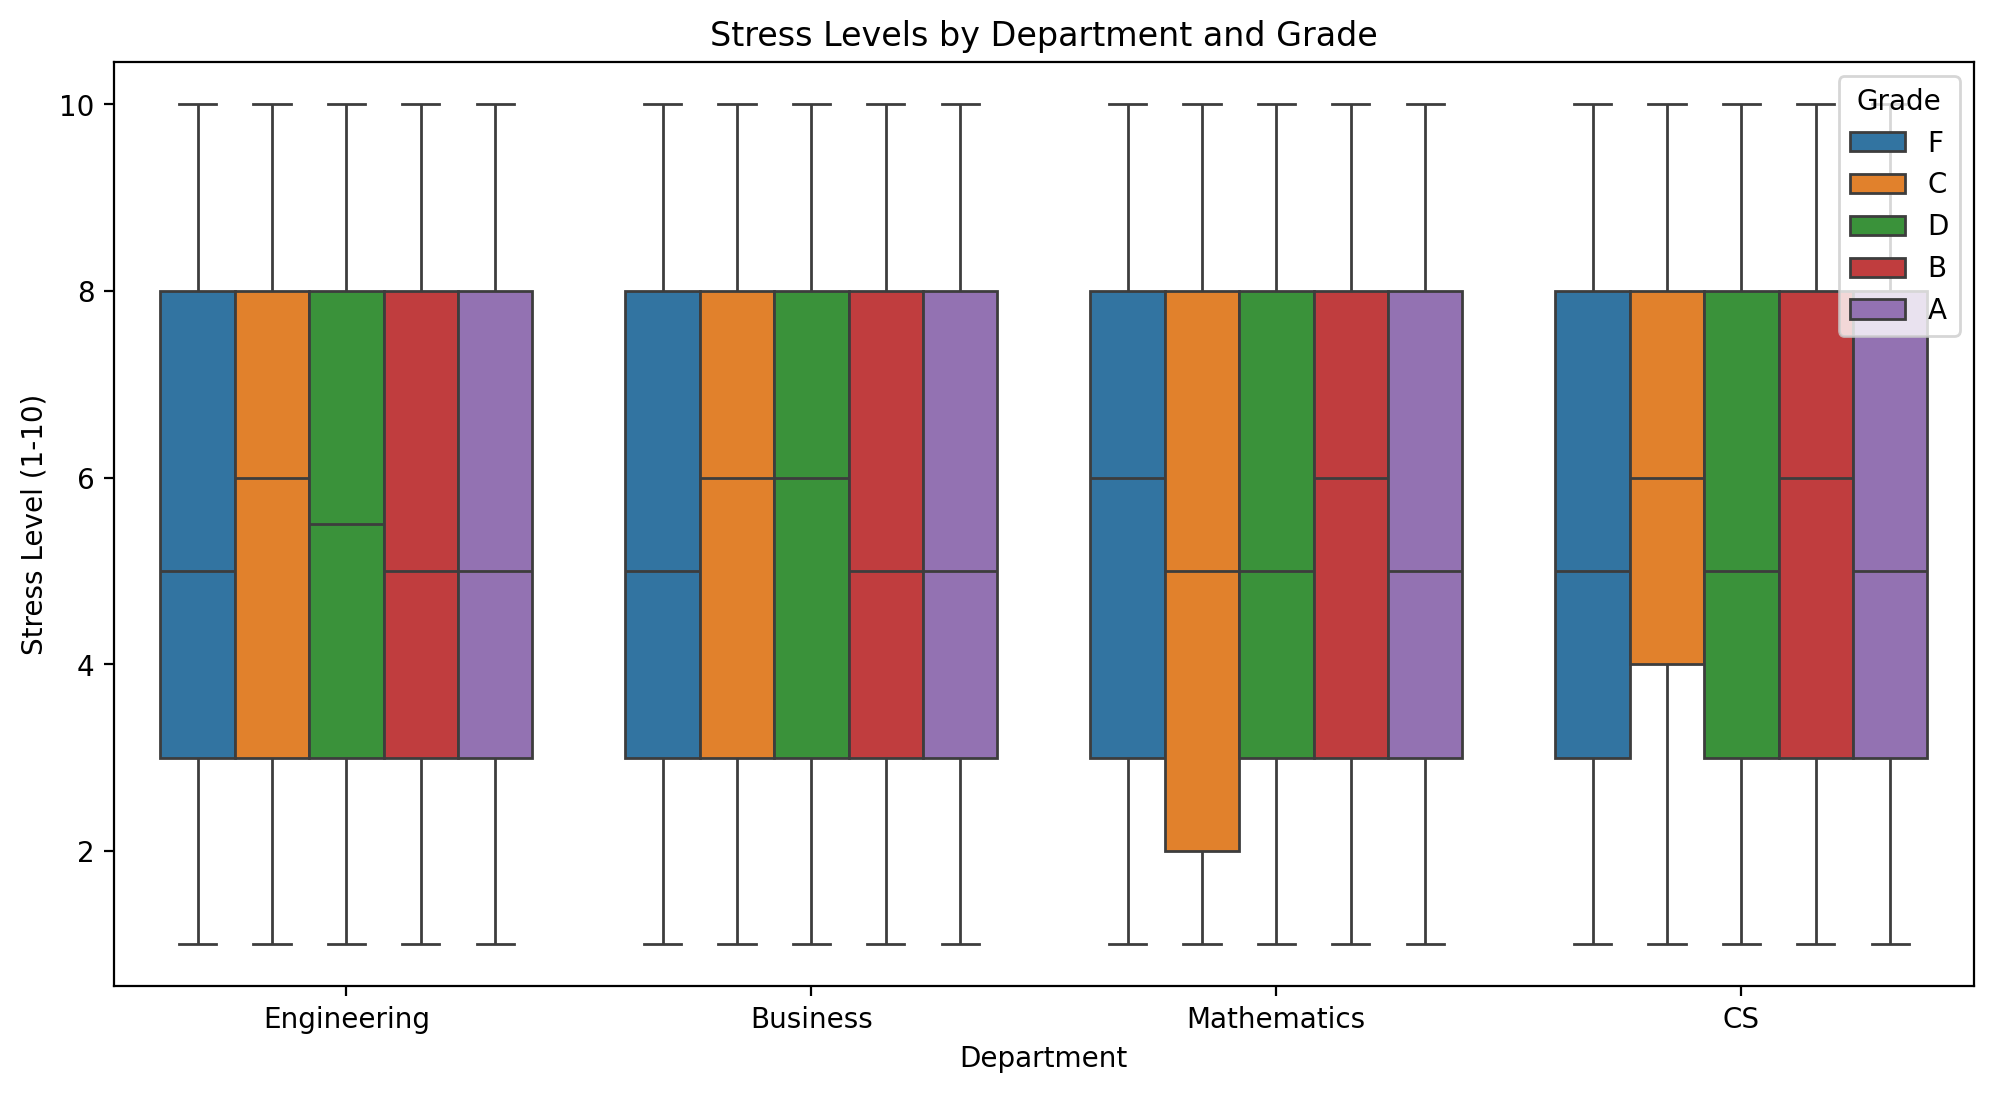

In [31]:
plt.figure(figsize=(12, 6), dpi=200)
sns.boxplot(data=df, x="Department", y="Stress_Level (1-10)", hue="Grade")

plt.xlabel("Department")
plt.ylabel("Stress Level (1-10)")
plt.title("Stress Levels by Department and Grade")
plt.legend(title="Grade", loc='upper right')
plt.show()


# 📊 Stress Levels by Department and Grade - Insights

## 🔍 Key Observations:
- **Stress levels are widely distributed** across all departments and grades.
- The **median stress level is around 5-6** across all departments.
- **All grade categories (A to F) have similar stress distributions**, indicating that stress alone may not be a strong predictor of academic performance.
- Some students with **high grades (A, B)** experience stress levels similar to those with lower grades (C, D, F).
- **Mathematics department shows a slightly higher variation**, but the overall trend remains similar.

## 📌 Recommendations for Students:
1. **Manage stress effectively**: Since all grades experience similar stress levels, adopting stress management techniques (exercise, time management, relaxation) can improve well-being.
2. **Identify personal stress triggers**: Academic stress might not be the only factor—consider social and personal stressors.
3. **Seek academic and mental support**: High stress doesn't necessarily mean poor grades, but prolonged stress can affect performance in the long run.

🧘‍♂️ **Balancing study and relaxation is key!**


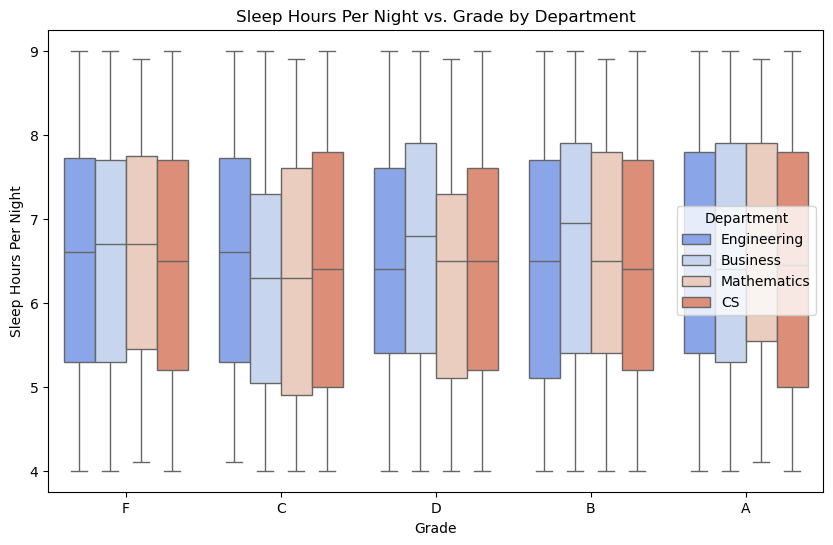

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Grade", y="Sleep_Hours_per_Night", hue="Department", data=df, palette="coolwarm")
plt.xlabel("Grade")
plt.ylabel("Sleep Hours Per Night")
plt.title("Sleep Hours Per Night vs. Grade by Department")
plt.legend(title="Department")
plt.show()


# 💤 Sleep Hours Per Night vs. Grade by Department

## 🔹 Key Insights:
1. **No Clear Relationship Between Sleep and Grades:**
   - The **median sleep hours** for all grades (A, B, C, D, F) remain **relatively similar** across all departments.
   - There is **no significant difference** in sleep patterns between students who got an A and those who got an F.

2. **Sleep Duration is Consistent Across Departments:**
   - All four departments (Engineering, Business, Mathematics, CS) show **a similar range of sleep hours**.
   - Most students sleep **between 5 to 8 hours per night** across all grades.

3. **Variability in Sleep Patterns:**
   - The **interquartile range (IQR)** is broad for all grades, indicating **diverse sleep habits**.
   - Some students sleep as little as **4 hours**, while others sleep up to **9 hours**.

4. **Slight Trend in Higher Grades:**
   - Business and Mathematics students with **A grades** tend to sleep slightly **more on average**.
   - However, the difference is **not significant enough** to conclude a strong correlation.

## 🏆 Conclusion:
- **Sleep alone does not determine academic success**, as students with varying sleep hours achieve different grades.
- Other factors like **study habits, internet access, and family background** may have a greater impact on grades.
- Encouraging students to maintain **consistent and sufficient sleep** may still support better academic performance. 📚😴


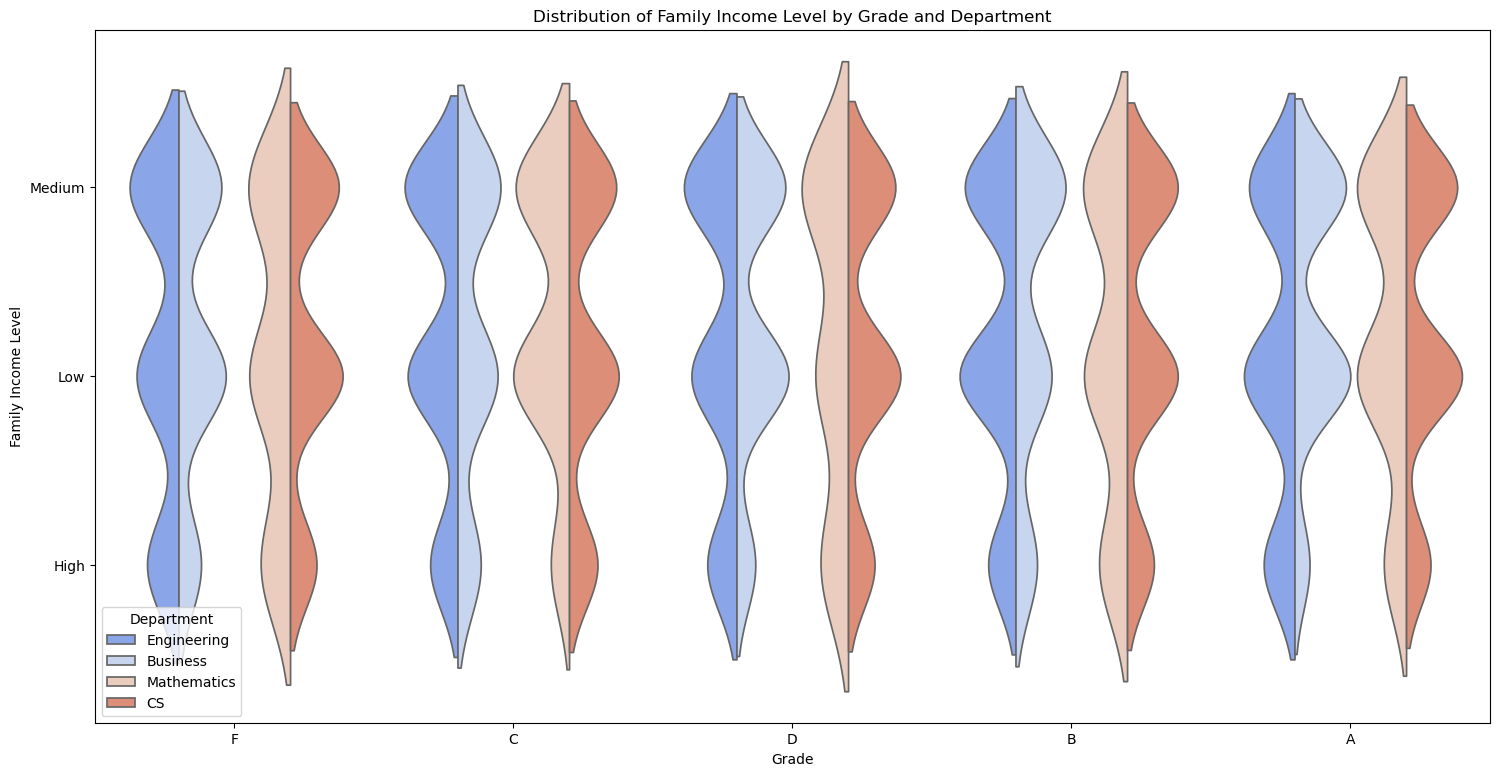

In [33]:
plt.figure(figsize=(18, 9))
sns.violinplot(x="Grade", y="Family_Income_Level", hue="Department", data=df, split=True, palette="coolwarm", inner=None)


plt.xlabel("Grade")
plt.ylabel("Family Income Level")
plt.title("Distribution of Family Income Level by Grade and Department")

plt.legend(title="Department")
plt.show()


# Analysis: Family Income Level vs. Grade by Department

## Key Observations:
1. **Wider violins** indicate **higher density** of students in that income range for a given grade.
2. **Students with High Family Income** are spread across all grades, meaning income alone does not guarantee higher academic performance.
3. **Low and Medium Income Groups** have a **higher density in lower grades (F, C, D)**, suggesting financial struggles may impact academic performance.
4. **Department Trends:**
   - **Engineering & Mathematics** have a slightly **higher presence** of students from medium and high-income families.
   - **Business & CS** have a more **even distribution** across all income levels.
5. **Grade A Distribution:**  
   - Students with **Medium and High Income** are more likely to achieve **A and B grades**.
   - **Low-Income students** have a presence in A grades but are more dominant in **F, C, and D grades**.

## Conclusion:
- **Higher Family Income** may contribute to better grades, but it is not a strict determinant.
- Students from **lower-income backgrounds** may need additional support to perform well academically.
- Departments show different distributions, suggesting financial background affects different fields in unique ways.


<Figure size 1800x900 with 0 Axes>

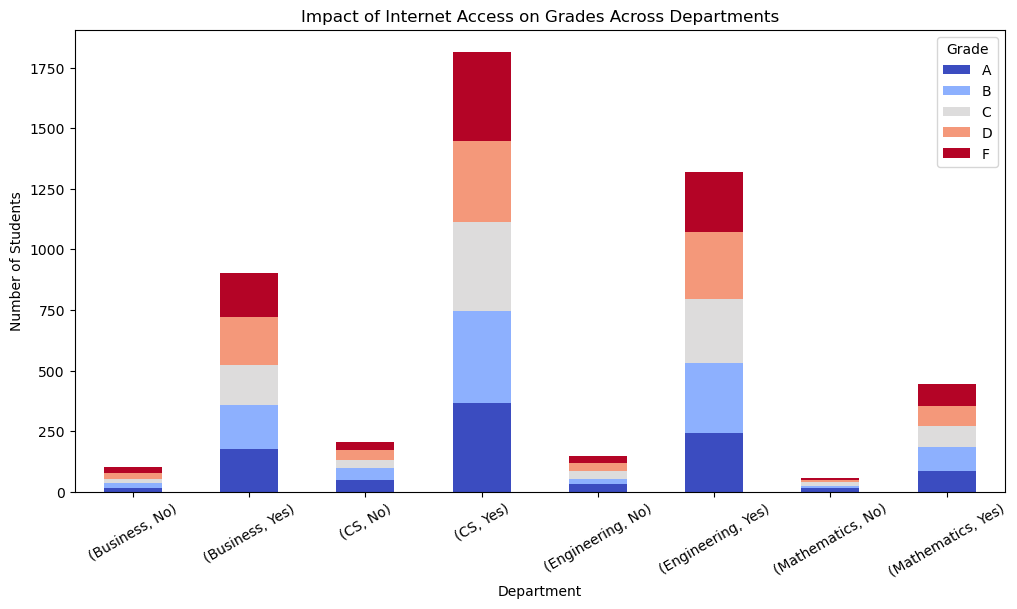

In [34]:
internet_access_counts = df.groupby(["Department", "Internet_Access_at_Home", "Grade"]).size().unstack()

plt.figure(figsize=(18, 9))
internet_access_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))


plt.xlabel("Department")
plt.ylabel("Number of Students")
plt.title("Impact of Internet Access on Grades Across Departments")

plt.legend(title="Grade")

plt.xticks(rotation=30) 
plt.show()


# 📊 Impact of Internet Access on Grades Across Departments

## 🔹 Key Insights:
1. **Internet Access Positively Affects Grades:**
   - Departments with **Internet Access (Yes)** have a **higher proportion of A and B grades**.
   - Departments with **Internet Access (No)** show **more students scoring C, D, or F**.

2. **CS and Engineering Students Are Most Affected:**
   - CS and Engineering departments have a **large difference between students with and without internet**.
   - Students **without internet** in these departments show a **higher failure rate (F grades)**.

3. **Business and Mathematics Show Less Variation:**
   - While internet access still helps, the difference between grades is **not as extreme** in these departments.
   - The grade distribution is more **balanced** compared to CS and Engineering.

4. **General Trend:**
   - **More internet access → Higher grades (A & B)**
   - **Less internet access → Lower grades (C, D & F)**

## 🏆 Conclusion:
Providing **better internet access** can **significantly improve academic performance**, especially in CS and Engineering. Universities should consider **supporting students with limited access** to enhance their success rates. 🚀


<Figure size 1200x600 with 0 Axes>

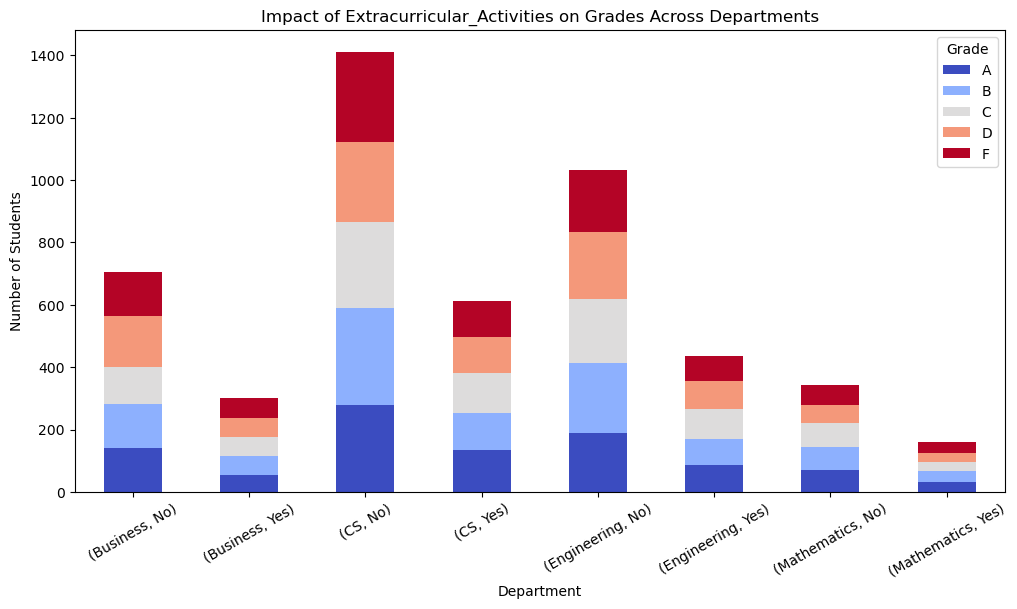

In [35]:
internet_access_counts = df.groupby(["Department", "Extracurricular_Activities", "Grade"]).size().unstack()

plt.figure(figsize=(12, 6))
internet_access_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))

plt.xlabel("Department")
plt.ylabel("Number of Students")
plt.title("Impact of Extracurricular_Activities on Grades Across Departments")

plt.legend(title="Grade")
plt.xticks(rotation=30) 
plt.show()


# 📊 Impact of Extracurricular Activities on Grades Across Departments  

## 🔍 Key Observations  
- **CS & Engineering Departments:**  
  - Students **without extracurricular activities** have a higher count and tend to receive **lower grades (C, D, F)**.  
  - Those **with extracurricular activities** are fewer but show a slightly better grade distribution.  

- **Business & Mathematics Departments:**  
  - **Without activities:** More students with lower grades.  
  - **With activities:** Slightly higher proportion of **A and B grades**.  

## 📌 Conclusion  
- **Lack of extracurricular activities** is associated with **lower grades** in most departments.  
- **Participation in activities might correlate with better academic performance**, but it is **not a guarantee** for higher grades.  



In [36]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,F,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,C,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,D,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,D,15.4,Yes,Yes,High School,High,2,7.1


In [37]:
features = ['Midterm_Score', 'Final_Score', 'Quizzes_Avg', 
            'Participation_Score', 'Projects_Score', 'Total_Score']

targets = ['Assignments_Avg', 'Attendance (%)']

for target in targets:
    df_known = df[df[target].notna()]
    df_missing = df[df[target].isna()]

    # Train model only if there are missing values
    if not df_missing.empty:
        X_train = df_known[features]
        y_train = df_known[target]

        X_missing = df_missing[features]

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict missing values
        df.loc[df[target].isna(), target] = model.predict(X_missing)

print(df[targets].isna().sum()) 

Assignments_Avg    0
Attendance (%)     0
dtype: int64


# Predicting Missing Values with Linear Regression

## **Objective 🎯**
Fill in missing values for **Assignments_Avg** and **Attendance (%)** using a **Linear Regression model** trained on related performance features.

## **Approach 🚀**
1. **Identify missing values** in target columns.  
2. **Train a Linear Regression model** using known data.  
3. **Predict missing values** based on correlated features.  
4. **Update the dataset** with predicted values.  
5. **Verify** that missing values are filled.

## **Outcome ✅**
- Successfully **imputes missing values** where applicable.
- Ensures a more **complete dataset** for further analysis.

Would you like to evaluate model performance? 📊


In [38]:
df[['Assignments_Avg', 'Attendance (%)' ]]

,Assignments_Avg,Attendance (%)
0,84.220000,52.29000
1,74.625142,97.27000
2,67.700000,57.19000
3,66.060000,95.15000
4,96.850000,54.18000
...,...,...
4995,80.090000,74.87976
4996,74.385038,65.11000
4997,94.280000,87.54000
4998,81.200000,92.56000


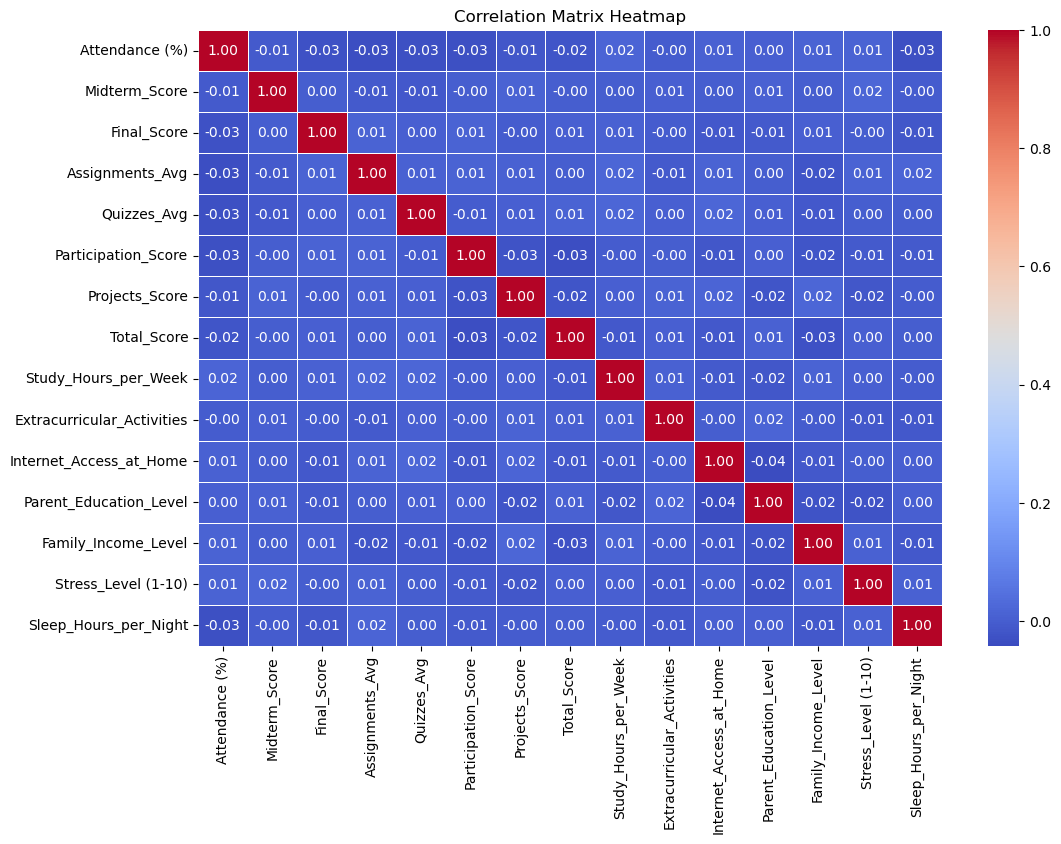

In [39]:
df['Family_Income_Level'] = df['Family_Income_Level'].map({'High': 2, 'Medium': 1, 'Low': 0})
df['Parent_Education_Level'] = df['Parent_Education_Level'].map({'PhD': 5, "Master's": 4, "Bachelor's": 3, 'High School': 2, 'Missing': 1})
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].map({'Yes': 2, 'No': 1})
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 2, 'No': 1})

selected_columns = [
    'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 
    'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 
    'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home',
    'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 
    'Sleep_Hours_per_Night'
]

df_selected = df[selected_columns].copy()

corr_matrix = df_selected.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


# 🔍 Summary of Correlation Heatmap Analysis

## **Key Takeaways**
- **Weak Correlations**: Most relationships between variables are close to **0**, showing minimal linear dependency.
- **Unexpected Trends**:
  - **Scores & Attendance** show a slight **negative correlation** (unusual).
  - **Parent Education & Internet Access** have little impact on performance.
- **Potential Issues**:
  - Possible **encoding errors** or **data inconsistencies**.
  - More features might be needed for better insights.